In [4]:
import scipy.sparse as sps
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader
from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample_double
from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample

In [7]:
# deleting a column, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
df = pd.read_csv(filepath_or_buffer='../data/rewatches.csv',
                         sep=",",
                         skiprows=1,
                         header=None,
                         dtype={0: int, 1: int,2: int},
                         engine='python')

Reader.df_col_normalize(df,2)
matrix_df=df.sort_values(by=[0,1])
matrix_df.to_csv('../output/out_2.csv', index=False)

In [1]:
# normalizing a column, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
df = pd.read_csv(filepath_or_buffer='../data/rewatches.csv',
                 sep=",",
                 skiprows=1,
                 header=None,
                 dtype={0: int, 1: int,2: int},
                 engine='python')

df[2]= Reader.df_col_normalize(df,2)
df=df.sort_values(by=[0,1])
df.to_csv('../output/out_2.csv', index=False)

In [6]:
# normalizing a column with substitution, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
matrix_df = pd.read_csv(filepath_or_buffer='../output/extended.csv',
                        sep=",",
                        skiprows=1,
                        header=None,
                        dtype={0: int, 1: int, 2: int},
                        engine='python')
matrix_df.columns = ["a","b","data"]
Reader.df_col_normalize(matrix_df,"data",{-1:-0.5,0:0.5})
matrix_df.head()

a  b  data
0  0  0  -0.5
1  0  1  -0.5
2  0  2  -0.5
3  0  3  -0.5
4  0  4  -0.5

In [2]:
# 1 HOT ENCODER
import Utils.Reader as Reader
Reader.oneHotEncoder(name="Type", colsToDelete=["Data"],colstoOneHot=["Type"],dfPath='../data/data_ICM_length.csv')

In [17]:
# DF SPLITTER
import Utils.Reader as Reader
Reader.df_splitter("Rewatch",[0,1],dtype={0: int, 1: int},name="rewatches_split_",dfPath='../data/rewatches.csv',colstoDefine=["UserID","ItemID","Rewatch"])

In [ ]:
# DF PREPROCESSING MODE
# 1-> Displayed (counts times a given Item has been displayed(in impressions list) to the user
# 2-> Extended (adds an interaction (-1) if a User has an item in impression list
# 3-> Count rewatches of each User-Item pair
# 4-> Count all rewatches of each user
import Utils.Reader as Reader
Reader.read_train_csr(matrix_path="../data/interactions_and_impressions.csv",preprocess=5,saving=True)

In [10]:
import seaborn as sbs
import Utils.Reader as Reader

df=Reader.only_read_train_csr(matrix_format="..")
sbs.heatmap(df.isna(),cbar=False)
df.Data=df.Data.astype(int)
df.Data=df.Data==0
sbs.heatmap(df,cbar=False)

EvaluatorHoldout: Ignoring 94 ( 0.2%) Users that have less than 1 test interactions


# Stacker

In [14]:
import scipy.sparse as sps
import numpy as np
import pandas as pd
URM_all_dataframe = pd.read_csv(filepath_or_buffer="../data/interactions_and_impressions.csv",
                                sep=",",
                                skiprows=1,
                                header=None,
                                dtype={0: int, 1: int, 2: str, 3: int},
                                engine='python')

URM_all_dataframe.columns = ["UserID", "ItemID", "others", "Interaction"]
URM_all_dataframe["Interaction"] = URM_all_dataframe["Interaction"].replace({0: 1, 1: 0})

ICM_dataframe = pd.read_csv(filepath_or_buffer="../data/rewatches.csv",
                            sep=",",
                            skiprows=1,
                            header=None,
                            dtype={0:int, 1:int, 2:int},
                            engine='python')

ICM_dataframe.columns = ["UserID","ItemID", "FeatureID"]
ICM_dataframe = ICM_dataframe[ICM_dataframe["FeatureID"].notna()]
n_features = len(ICM_dataframe["FeatureID"].unique())

print ("Number of tags\t {}, Number of item-tag tuples {}".format(n_features, len(ICM_dataframe)))
mapped_id, original_id = pd.factorize(URM_all_dataframe["UserID"].unique())

print("Unique UserID in the URM are {}".format(len(original_id)))

all_item_indices = pd.concat([URM_all_dataframe["UserID"], ICM_dataframe["UserID"]], ignore_index=True)
mapped_id, original_id = pd.factorize(all_item_indices.unique())

print("Unique UserID in the URM and ICM are {}".format(len(original_id)))

user_original_ID_to_index = pd.Series(mapped_id, index=original_id)
mapped_id, original_id = pd.factorize(URM_all_dataframe["ItemID"].unique())

print("Unique ItemID in the URM are {}".format(len(original_id)))

all_item_indices = pd.concat([URM_all_dataframe["ItemID"], ICM_dataframe["ItemID"]], ignore_index=True)
mapped_id, original_id = pd.factorize(all_item_indices.unique())

print("Unique ItemID in the URM and ICM are {}".format(len(original_id)))

item_original_ID_to_index = pd.Series(mapped_id, index=original_id)
mapped_id, original_id = pd.factorize(ICM_dataframe["FeatureID"].unique())
feature_original_ID_to_index = pd.Series(mapped_id, index=original_id)

print("Unique FeatureID in the URM are {}".format(len(feature_original_ID_to_index)))
URM_all_dataframe["UserID"] = URM_all_dataframe["UserID"].map(user_original_ID_to_index)
URM_all_dataframe["ItemID"] = URM_all_dataframe["ItemID"].map(item_original_ID_to_index)
ICM_dataframe["UserID"] = ICM_dataframe["UserID"].map(user_original_ID_to_index)
ICM_dataframe["ItemID"] = ICM_dataframe["ItemID"].map(item_original_ID_to_index)
ICM_dataframe["FeatureID"] = ICM_dataframe["FeatureID"].map(feature_original_ID_to_index)
n_users = len(user_original_ID_to_index)
n_items = len(item_original_ID_to_index)
n_features = len(feature_original_ID_to_index)
URM_all = sps.csr_matrix((URM_all_dataframe["Interaction"].values,
                          (URM_all_dataframe["UserID"].values, URM_all_dataframe["ItemID"].values)),
                         shape = (n_users, n_items)) #always support a desired shape
ICM_all = sps.csr_matrix((np.ones(len(ICM_dataframe["ItemID"].values)),
                          (ICM_dataframe["ItemID"].values, ICM_dataframe["FeatureID"].values)),
                         shape = (n_items, n_features))

ICM_all.data = np.ones_like(ICM_all.data)
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader

from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all ,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])

Number of tags	 631, Number of item-tag tuples 1051828
Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629
Unique ItemID in the URM are 24507
Unique ItemID in the URM and ICM are 24507
Unique FeatureID in the URM are 631
EvaluatorHoldout: Ignoring 1486 ( 3.6%) Users that have less than 1 test interactions


In [18]:
import scipy.sparse as sps
import numpy as np
import pandas as pd
URM_all_dataframe = pd.read_csv(filepath_or_buffer="../data/interactions_and_impressions.csv",
                                sep=",",
                                skiprows=1,
                                header=None,
                                dtype={0: int, 1: int, 2: str, 3: int},
                                engine='python')

URM_all_dataframe.columns = ["UserID", "ItemID", "others", "Interaction"]
URM_all_dataframe["Interaction"] = URM_all_dataframe["Interaction"].replace({0: 1, 1: 0})

ICM_dataframe = pd.read_csv(filepath_or_buffer="../data/data_ICM_type.csv",
                            sep=",",
                            skiprows=1,
                            header=None,
                            dtype={0:int, 1:int, 2:int},
                            engine='python')

ICM_dataframe.columns = ["ItemID", "FeatureID","Data"]
ICM_dataframe = ICM_dataframe[ICM_dataframe["FeatureID"].notna()]
n_features = len(ICM_dataframe["FeatureID"].unique())

print ("Number of tags\t {}, Number of item-tag tuples {}".format(n_features, len(ICM_dataframe)))
mapped_id, original_id = pd.factorize(URM_all_dataframe["UserID"].unique())

print("Unique UserID in the URM are {}".format(len(original_id)))


print("Unique UserID in the URM and ICM are {}".format(len(original_id)))

user_original_ID_to_index = pd.Series(mapped_id, index=original_id)
mapped_id, original_id = pd.factorize(URM_all_dataframe["ItemID"].unique())

print("Unique ItemID in the URM are {}".format(len(original_id)))

all_item_indices = pd.concat([URM_all_dataframe["ItemID"], ICM_dataframe["ItemID"]], ignore_index=True)
mapped_id, original_id = pd.factorize(all_item_indices.unique())

print("Unique ItemID in the URM and ICM are {}".format(len(original_id)))

item_original_ID_to_index = pd.Series(mapped_id, index=original_id)
mapped_id, original_id = pd.factorize(ICM_dataframe["FeatureID"].unique())
feature_original_ID_to_index = pd.Series(mapped_id, index=original_id)

print("Unique FeatureID in the URM are {}".format(len(feature_original_ID_to_index)))
URM_all_dataframe["ItemID"] = URM_all_dataframe["ItemID"].map(item_original_ID_to_index)
ICM_dataframe["ItemID"] = ICM_dataframe["ItemID"].map(item_original_ID_to_index)
ICM_dataframe["FeatureID"] = ICM_dataframe["FeatureID"].map(feature_original_ID_to_index)
n_users = len(user_original_ID_to_index)
n_items = len(item_original_ID_to_index)
n_features = len(feature_original_ID_to_index)
URM_all = sps.csr_matrix((URM_all_dataframe["Interaction"].values,
                          (URM_all_dataframe["UserID"].values, URM_all_dataframe["ItemID"].values)),
                         shape = (n_users, n_items)) #always support a desired shape
ICM_all = sps.csr_matrix((np.ones(len(ICM_dataframe["ItemID"].values)),
                          (ICM_dataframe["ItemID"].values, ICM_dataframe["FeatureID"].values)),
                         shape = (n_items, n_features))

ICM_all.data = np.ones_like(ICM_all.data)
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader

from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all ,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])

Number of tags	 5, Number of item-tag tuples 23091
Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629
Unique ItemID in the URM are 24507
Unique ItemID in the URM and ICM are 27968
Unique FeatureID in the URM are 5
EvaluatorHoldout: Ignoring 1537 ( 3.7%) Users that have less than 1 test interactions


# Evaluator data

In [7]:
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader

from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
#URM_all=Reader.load_URM(values_to_replace={0.01:0.02})
URM_all=Reader.read_train_csr()
#URM_all=Reader.load_URM("../output/URM_2_mean.csv")
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all ,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])



Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629
5826506
EvaluatorHoldout: Ignoring 1564 ( 3.8%) Users that have less than 1 test interactions


In [1]:
### DOUBLE EVALUATION SPLIT

from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader
from Data_manager.split_functions.split_train_validation_random_holdout import \
    split_train_in_two_percentage_global_sample_double
values_to_replace={0.01: 0.1,0.0:0.2}
#URM_all=Reader.load_URM(values_to_replace={0.01:0.02})
#URM_all=Reader.read_train_csr(values_to_replace=values_to_replace)
URM_all=Reader.read_train_csr()

#URM_all_new=Reader.load_URM("../output/out_10.csv",values_to_replace={0.01: 0.0})
URM_all_new=Reader.load_URM("../data/interactions_and_impressions_v4.csv",vals_to_not_keep=[0.01])

#URM_all=Reader.load_URM("../output/URM_2_mean.csv")
URM_train, URM_test,URM_train2 = split_train_in_two_percentage_global_sample_double(URM_all ,URM_all_new,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])
URM_train, URM_test,URM_train2

Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629
5826506
EvaluatorHoldout: Ignoring 1564 ( 3.8%) Users that have less than 1 test interactions


(<41629x24507 sparse matrix of type '<class 'numpy.float64'>'
 	with 841407 stored elements in Compressed Sparse Row format>,
 <41629x24507 sparse matrix of type '<class 'numpy.float64'>'
 	with 210421 stored elements in Compressed Sparse Row format>,
 <41629x24507 sparse matrix of type '<class 'numpy.float64'>'
 	with 841407 stored elements in Compressed Sparse Row format>)

In [ ]:
import pandas as pd
import numpy as np
coo=URM_train.tocoo()
df = pd.DataFrame({'index': coo.row, 'col': coo.col, 'data': coo.data}).set_index(["index", "col"])

n_rows, n_cols = coo.shape
rows, cols = map(np.ndarray.flatten, np.mgrid[:n_rows, :n_cols])
filling = pd.DataFrame({"index": rows, "col": cols, "data": np.repeat(0, n_rows * n_cols)}).set_index(["index", "col"])

res = df.combine_first(filling).reset_index()

In [2]:
ICM_all=Reader.load_ICM_type(file_path="../data/data_ICM_type.csv")

# Recommenders

In [10]:
#1
# BEST MODEL UNTIL NOW _ PROVA
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender

recommender_ItemKNNCFCBF = ItemUserHybridKNNRecommender(URM_train2)
recommender_ItemKNNCFCBF.fit()

result_df, _ = evaluator_validation.evaluateRecommender(recommender_ItemKNNCFCBF)
result_df

ItemUserHybridKNNRecommender: URM Detected 10597 (25.5%) users with no interactions.
ItemKNNCFRecommender: URM Detected 10597 (25.5%) users with no interactions.
UserKNNCFRecommender: URM Detected 10597 (25.5%) users with no interactions.
Similarity column 24507 (100.0%), 5715.42 column/sec. Elapsed time 4.29 sec
Similarity column 41629 (100.0%), 2018.52 column/sec. Elapsed time 20.62 sec
[[ 1.1458116e+01  1.8298288e+01  1.4825038e+01 ...  1.8081645e+00
   3.5786226e+00  9.8376721e-01]
 [-1.7464533e-02 -1.7464533e-02 -1.7464533e-02 ... -1.7464533e-02
  -1.7464533e-02 -1.7464533e-02]
 [-1.7464533e-02 -1.7464533e-02 -1.7464533e-02 ... -1.7464533e-02
  -1.7464533e-02 -1.7464533e-02]
 ...
 [-1.7464533e-02 -1.7464533e-02 -1.7464533e-02 ... -1.7464533e-02
  -1.7464533e-02 -1.7464533e-02]
 [-1.7464533e-02 -1.7464533e-02 -1.7464533e-02 ... -1.7464533e-02
  -1.7464533e-02 -1.7464533e-02]
 [-1.7464533e-02 -1.7464533e-02 -1.7464533e-02 ... -1.7464533e-02
  -1.7464533e-02 -1.7464533e-02]]
[[-0.006

PRECISION PRECISION_RECALL_MIN_DEN    RECALL      MAP MAP_MIN_DEN  \
cutoff                                                                     
10      0.000396                 0.000417  0.000268  0.00008    0.000085   

             MRR      NDCG       F1  HIT_RATE ARHR_ALL_HITS  ...  \
cutoff                                                       ...   
10      0.000797  0.000216  0.00032  0.003963      0.000797  ...   

       COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
cutoff                                                              
10          0.254582          0.001009    0.254582       0.000449   

       SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
cutoff                                                                   
10            3.323326                   0.900474             0.001066   

       RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                                               
10                  0.253766                 0.050357       0.59968  

[1 rows x 27 columns]

In [8]:
#1
# BEST MODEL UNTIL NOW - CONTROPROVA
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender

recommender_ItemKNNCFCBF = ItemUserHybridKNNRecommender(URM_train)
recommender_ItemKNNCFCBF.fit()

result_df, _ = evaluator_validation.evaluateRecommender(recommender_ItemKNNCFCBF)
result_df

Similarity column 24507 (100.0%), 5541.05 column/sec. Elapsed time 4.42 sec
Similarity column 41629 (100.0%), 2172.07 column/sec. Elapsed time 19.17 sec
[[-0.08553939 -0.2897797  -0.10636894 ... -0.29903707 -0.19831035
  -0.29903707]
 [-0.29903707 -0.29903707 -0.29903707 ... -0.29903707 -0.29903707
  -0.29903707]
 [ 0.22870924  0.06829344  0.7542566  ... -0.12867144 -0.22001164
  -0.24567741]
 ...
 [ 0.09544264 -0.20160273  0.00710104 ... -0.29903707 -0.29903707
  -0.29903707]
 [ 0.23547935  0.00770144  0.15445758 ... -0.29903707  0.07575847
  -0.29903707]
 [-0.29903707 -0.29903707 -0.29903707 ... -0.29903707 -0.29903707
  -0.15957636]]
[[-0.04237736 -0.04237736 -0.04237736 ... -0.04237736 -0.01561465
  -0.04237736]
 [-0.04237736 -0.04237736 -0.04237736 ... -0.04237736 -0.04237736
  -0.04237736]
 [-0.03417928 -0.03627252  0.0596341  ... -0.03233292 -0.02562009
  -0.04237736]
 ...
 [-0.00578903 -0.04237736 -0.02869781 ... -0.04237736 -0.04237736
  -0.04237736]
 [-0.01176035 -0.04237736 

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


[[-0.40259534 -0.40259534 -0.40259534 ... -0.40259534 -0.40259534
  -0.40259534]
 [-0.330549   -0.22412656 -0.40259534 ... -0.27376232 -0.40259534
  -0.40259534]
 [-0.2636754  -0.31780076 -0.37454912 ... -0.40259534 -0.40259534
  -0.40259534]
 ...
 [-0.29847717 -0.18086486 -0.3704737  ... -0.3017072  -0.40259534
   0.03964517]
 [-0.0753002  -0.09693636 -0.35605893 ... -0.40259534 -0.40259534
  -0.40259534]
 [ 0.29049152  0.4697595  -0.12943543 ... -0.2809123  -0.00926997
   0.90337455]]
[[-0.04670557 -0.04670557 -0.04670557 ... -0.04670557 -0.04670557
  -0.04670557]
 [-0.04670557 -0.03925892 -0.04670557 ... -0.03299514 -0.04670557
  -0.04670557]
 [-0.03994149 -0.03788119 -0.04670557 ... -0.04670557 -0.04670557
  -0.04670557]
 ...
 [-0.04670557 -0.04192848 -0.04670557 ... -0.04670557 -0.04670557
  -0.0409114 ]
 [-0.00640714 -0.04670557 -0.03833025 ... -0.04670557 -0.04670557
  -0.04670557]
 [ 0.05035551  0.0783058  -0.04166144 ... -0.04670557 -0.03074039
   0.00412877]]
[[-0.10972053 -0

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


[[-0.14107123 -0.30396524 -0.22738044 ... -0.38906732 -0.3635264
  -0.3147048 ]
 [-0.32494757 -0.14023879 -0.38906732 ... -0.31298193 -0.38906732
  -0.38906732]
 [-0.30866203  0.01449296 -0.34721828 ... -0.38906732 -0.32842517
   0.24799468]
 ...
 [-0.27736768 -0.33968657 -0.38906732 ... -0.38906732 -0.33179778
  -0.38906732]
 [ 0.19212714 -0.2815237  -0.26742885 ... -0.38906732 -0.29845074
  -0.38906732]
 [-0.19443743 -0.07612626 -0.35345334 ... -0.3067406  -0.31498718
  -0.31111246]]
[[-0.03904303 -0.03329042 -0.04069335 ... -0.04735885 -0.04735885
  -0.04735885]
 [-0.04735885 -0.04735885 -0.04735885 ... -0.04735885 -0.04735885
  -0.04735885]
 [-0.04735885 -0.02847832 -0.04735885 ... -0.04735885 -0.04735885
  -0.01887995]
 ...
 [-0.04735885 -0.04735885 -0.04735885 ... -0.04735885 -0.04735885
  -0.04735885]
 [-0.00829035 -0.04735885 -0.04735885 ... -0.04735885 -0.04735885
  -0.04735885]
 [-0.02874934 -0.01227853 -0.04735885 ... -0.04735885 -0.04111882
  -0.04735885]]
[[-0.13979536 -0.

PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
cutoff                                                                      
10      0.050643                 0.088188  0.082967  0.025598    0.043495   

             MRR NDCG        F1  HIT_RATE ARHR_ALL_HITS  ... COVERAGE_USER  \
cutoff                                                   ...                 
10      0.167678  NaN  0.062895  0.331037      0.205083  ...       0.96243   

       COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI SHANNON_ENTROPY  \
cutoff                                                                
10                0.3186     0.96243       0.038621        9.151731   

       RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI RATIO_SHANNON_ENTROPY  \
cutoff                                                                         
10                       0.992407             0.087696              0.694045   

       RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                         
10                     3.649916      0.400915  

[1 rows x 27 columns]

In [5]:
import scipy.sparse as sps
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader
from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample_double
from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
URM_all,ICM_all=Reader.load_URM_and_ICM_users(ICM_path="../data/displayed.csv",ICM_cols=["UserID","ItemID","others", "FeatureID"],ICM_dtype={0: int, 1: int, 2: int, 3: int})
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all ,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])
stacked_URM = sps.vstack([URM_train, ICM_all.T])
stacked_URM = sps.csr_matrix(stacked_URM)

stacked_ICM = sps.csr_matrix(stacked_URM.T)

stacked_URM, stacked_ICM

Number of tags	 49, Number of item-tag tuples 5826506
Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629
Unique ItemID in the URM are 24507
Unique ItemID in the URM and ICM are 24507
Unique FeatureID in the URM are 49
EvaluatorHoldout: Ignoring 1565 ( 3.8%) Users that have less than 1 test interactions


(<41678x24507 sparse matrix of type '<class 'numpy.float64'>'
 	with 912159 stored elements in Compressed Sparse Row format>,
 <24507x41678 sparse matrix of type '<class 'numpy.float64'>'
 	with 912159 stored elements in Compressed Sparse Row format>)

In [6]:
#1
# BEST MODEL UNTIL NOW - CONTROPROVA
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender

recommender_ItemKNNCFCBF = ItemUserHybridKNNRecommender(stacked_URM)
recommender_ItemKNNCFCBF.fit()

result_df, _ = evaluator_validation.evaluateRecommender(recommender_ItemKNNCFCBF)
result_df

Similarity column 24507 (100.0%), 1312.15 column/sec. Elapsed time 18.68 sec
Similarity column 41678 (100.0%), 1796.61 column/sec. Elapsed time 23.20 sec
[[-3.45919430e-01  1.89515805e+00  1.42116988e+00 ... -3.75897391e-03
  -1.29733101e-01 -3.45919430e-01]
 [-3.45919430e-01  1.49419940e+00  3.89129311e-01 ... -3.21172208e-01
  -3.45919430e-01 -2.36060545e-01]
 [ 6.61491334e-01  9.51995754e+00  7.85501051e+00 ...  5.36206126e-01
  -2.87957758e-01 -8.75264034e-02]
 ...
 [-2.64764637e-01  9.88418758e-01 -3.45919430e-01 ... -3.45919430e-01
  -3.45919430e-01 -3.15371782e-01]
 [-4.04424556e-02  5.46613646e+00  4.20780277e+00 ...  1.54687428e+00
  -3.45919430e-01 -8.04720894e-02]
 [-2.70973593e-01  4.90461826e+00  3.31078219e+00 ...  1.05779655e-01
  -2.29313985e-01 -2.97507674e-01]]
[[-4.4417743e-02  4.1443877e+00  2.7589033e+00 ... -3.3835132e-02
   3.8293900e+01 -4.4417743e-02]
 [-4.2509053e-02  7.1756136e-01  3.2227972e-01 ... -4.4417743e-02
  -4.4417743e-02 -2.5141811e-02]
 [ 4.6771493

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


[[-3.09566021e-01  4.92286682e+00  3.83048677e+00 ... -2.15573180e-02
  -3.33966851e-01 -2.13023946e-01]
 [-3.87804240e-01  2.82087207e+00  2.08803177e+00 ... -3.49914610e-01
  -3.87804240e-01 -3.10933590e-01]
 [ 7.34959841e-02  4.60418739e+01  2.78945560e+01 ...  7.17301667e-01
  -2.47872457e-01  4.77093220e-01]
 ...
 [ 1.53540146e+00  1.11569157e+01  9.04156494e+00 ...  3.24361652e-01
  -1.03297226e-01 -2.04836026e-01]
 [ 3.64460409e-01  1.74884140e+00  1.50344944e+00 ... -3.64035368e-01
  -3.87804240e-01 -3.71494979e-01]
 [ 3.44617516e-02  2.71377802e+00  4.17251253e+00 ... -2.58875072e-01
  -3.87804240e-01 -3.08985710e-01]]
[[-4.8515800e-02  1.4652624e+00  1.4719996e+00 ... -4.8515800e-02
  -4.8515800e-02 -3.4851540e-02]
 [-4.8515800e-02  8.8573732e+00  7.8070002e+00 ... -4.8515800e-02
  -4.8515800e-02 -4.8515800e-02]
 [-1.8031370e-02  3.6376431e+01  1.9006973e+01 ... -3.4498502e-02
  -4.8515800e-02 -4.8515800e-02]
 ...
 [ 5.9334449e-02  7.1139283e+00  4.5573168e+00 ... -4.8515800e

PRECISION PRECISION_RECALL_MIN_DEN    RECALL       MAP MAP_MIN_DEN  \
cutoff                                                                      
10      0.050487                   0.0881  0.082969  0.025364    0.043201   

             MRR NDCG        F1 HIT_RATE ARHR_ALL_HITS  ... COVERAGE_USER  \
cutoff                                                  ...                 
10      0.165337  NaN  0.062775   0.3281      0.202835  ...      0.962406   

       COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI SHANNON_ENTROPY  \
cutoff                                                                
10              0.315765    0.962406       0.036715        9.079773   

       RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI RATIO_SHANNON_ENTROPY  \
cutoff                                                                         
10                       0.992036             0.076388              0.680319   

       RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                         
10                     3.688594      0.366665  

[1 rows x 27 columns]

In [3]:
#2
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
import Utils.Reader as Reader

recommender_ItemKNNCBF = ItemKNNCBFRecommender(URM_train, ICM_all)
recommender_ItemKNNCBF.fit()

result_df, _ = evaluator_validation.evaluateRecommender(recommender_ItemKNNCBF)
result_df

Similarity column 24507 (100.0%), 2009.24 column/sec. Elapsed time 12.20 sec
EvaluatorHoldout: Processed 40047 (100.0%) in 45.58 sec. Users per second: 879


PRECISION PRECISION_RECALL_MIN_DEN    RECALL      MAP MAP_MIN_DEN  \
cutoff                                                                     
10       0.00019                 0.000334  0.000316  0.00006    0.000106   

             MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
cutoff                                                        ...   
10      0.000597  0.000181  0.000237  0.001898      0.000597  ...   

       COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
cutoff                                                              
10          0.961998          0.001826    0.961998       0.215608   

       SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
cutoff                                                                   
10           12.579851                   1.000049             0.489366   

       RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                                               
10                  0.954084                  0.09864      0.577184  

[1 rows x 27 columns]

In [7]:
from Recommenders.FactorizationMachines.LightFMRecommender import LightFMCFRecommender

recommender = LightFMCFRecommender(URM_train2)
recommender.fit(epochs = 10)

result_df, _ = evaluator_validation.evaluateRecommender(recommender)
result_df

LightFMCFRecommender: URM Detected 18436 (44.3%) users with no interactions.
LightFMCFRecommender: URM Detected 4 ( 0.0%) items with no interactions.
LightFMCFRecommender: Epoch 1 of 10. Elapsed time 4.44 sec
LightFMCFRecommender: Epoch 2 of 10. Elapsed time 6.78 sec
LightFMCFRecommender: Epoch 3 of 10. Elapsed time 7.91 sec
LightFMCFRecommender: Epoch 4 of 10. Elapsed time 8.67 sec
LightFMCFRecommender: Epoch 5 of 10. Elapsed time 9.63 sec
LightFMCFRecommender: Epoch 6 of 10. Elapsed time 10.70 sec
LightFMCFRecommender: Epoch 7 of 10. Elapsed time 11.48 sec
LightFMCFRecommender: Epoch 8 of 10. Elapsed time 12.10 sec
LightFMCFRecommender: Epoch 9 of 10. Elapsed time 12.72 sec
LightFMCFRecommender: Epoch 10 of 10. Elapsed time 13.42 sec
LightFMCFRecommender: Terminating at epoch 10. Elapsed time 13.42 sec


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


KeyboardInterrupt: 

Similarity column 24507 (100.0%), 1271.66 column/sec. Elapsed time 19.27 sec
Similarity column 24507 (100.0%), 3245.96 column/sec. Elapsed time 7.55 sec


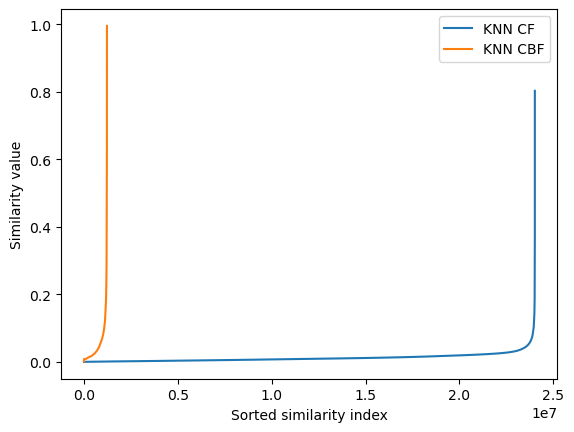

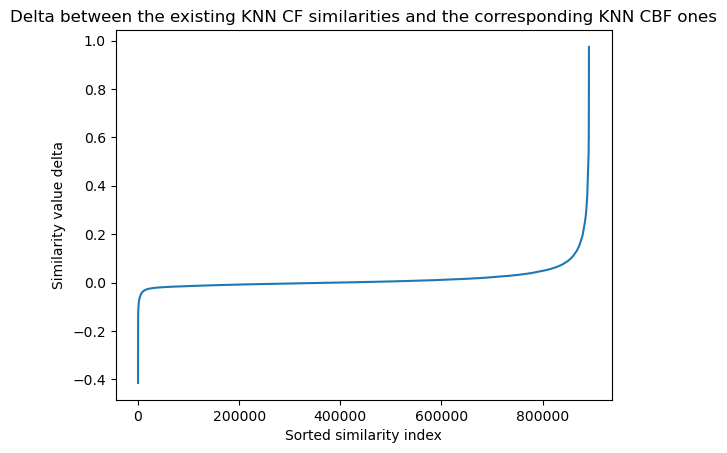

W_sparse_CF has 2.40E+07 values and 3.71 % in common with CBF
W_sparse_CBF has 1.23E+06 values and 72.78 % in common with CF
W_sparse_delta has 8.92E+05 values


In [8]:
import numpy as np
from matplotlib import pyplot
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender


itemKNNCF = ItemKNNCFRecommender(URM_train)
itemKNNCF.fit()

itemKNNCBF = ItemKNNCBFRecommender(URM_train, ICM_all)
itemKNNCBF.fit()
W_sparse_CF = itemKNNCF.W_sparse
W_sparse_CBF = itemKNNCBF.W_sparse
W_sparse_CF_sorted = np.sort(W_sparse_CF.data.copy())
W_sparse_CBF_sorted = np.sort(W_sparse_CBF.data.copy())
pyplot.plot(W_sparse_CF_sorted, label = 'KNN CF')
pyplot.plot(W_sparse_CBF_sorted, label = 'KNN CBF')
pyplot.ylabel('Similarity value')
pyplot.xlabel('Sorted similarity index')
pyplot.legend()
pyplot.show()

# Get common structure
W_sparse_CF_structure = W_sparse_CF.copy()
W_sparse_CF_structure.data = np.ones_like(W_sparse_CF_structure.data)

W_sparse_CBF_structure = W_sparse_CBF.copy()
W_sparse_CBF_structure.data = np.ones_like(W_sparse_CBF_structure.data)

W_sparse_common = W_sparse_CF_structure.multiply(W_sparse_CBF_structure)

# Get values of both in common structure of CF
W_sparse_delta = W_sparse_CBF.copy().multiply(W_sparse_common)
W_sparse_delta -= W_sparse_CF.copy().multiply(W_sparse_common)
W_sparse_delta_sorted = np.sort(W_sparse_delta.data.copy())
pyplot.plot(W_sparse_delta_sorted)
pyplot.ylabel('Similarity value delta')
pyplot.xlabel('Sorted similarity index')
pyplot.title("Delta between the existing KNN CF similarities and the corresponding KNN CBF ones")
pyplot.show()
# How many values we have in common?

print("W_sparse_CF has {:.2E} values and {:.2f} % in common with CBF".format(W_sparse_CF.nnz, W_sparse_common.nnz/W_sparse_CF.nnz*100))
print("W_sparse_CBF has {:.2E} values and {:.2f} % in common with CF".format(W_sparse_CBF.nnz, W_sparse_common.nnz/W_sparse_CBF.nnz*100))

print("W_sparse_delta has {:.2E} values".format(W_sparse_delta.nnz))

W_sparse_delta = W_sparse_delta.tocoo()


In [6]:
from Recommenders.FeatureWeighting.CFW_D_Similarity_Linalg import CFW_D_Similarity_Linalg
import Utils.Reader as Reader
from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
from Utils.Evaluator import EvaluatorHoldout
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender



URM_train, URM_test,URM_train2 = split_train_in_two_percentage_global_sample_double(URM_all ,URM_all_new,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])

itemKNNCF = ItemKNNCFRecommender(URM_train)
itemKNNCF.fit()
W_sparse_CF = itemKNNCF.W_sparse
CFW_weithing = CFW_D_Similarity_Linalg(URM_train2, ICM_all, W_sparse_CF)
CFW_weithing.fit()
result_df, _ = evaluator_validation.evaluateRecommender(CFW_weithing)
result_df

EvaluatorHoldout: Ignoring 1582 ( 3.8%) Users that have less than 1 test interactions
Similarity column 24507 (100.0%), 2445.33 column/sec. Elapsed time 10.02 sec


AssertionError: CFW_D_Similarity_Linalg: URM_train has 24507 items but ICM_train has 27968

In [11]:
from Recommenders.RP3betaCBFRecommender import RP3betaCBFRecommender
#4
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
import Utils.Reader as Reader

rp3betaCBF_recommender = RP3betaCBFRecommender(
    URM_train=URM_train,
    ICM_train=Reader.load_ICM_displayed(),
    verbose=False
)

rp3betaCBF_recommender.fit()
result_df, _ = evaluator_validation.evaluateRecommender(rp3betaCBF_recommender)
result_df

EvaluatorHoldout: Processed 41528 (100.0%) in 27.19 sec. Users per second: 1527


PRECISION PRECISION_RECALL_MIN_DEN    RECALL      MAP MAP_MIN_DEN  \
cutoff                                                                     
10      0.000547                 0.000614  0.000371  0.00016    0.000176   

             MRR      NDCG        F1  HIT_RATE ARHR_ALL_HITS  ...  \
cutoff                                                        ...   
10      0.001573  0.000186  0.000442  0.005442      0.001585  ...   

       COVERAGE_USER COVERAGE_USER_HIT USERS_IN_GT DIVERSITY_GINI  \
cutoff                                                              
10          0.997574          0.005429    0.997574       0.253729   

       SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL RATIO_DIVERSITY_GINI  \
cutoff                                                                   
10           12.698157                   1.000247             0.816687   

       RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY RATIO_NOVELTY  
cutoff                                                               
10                  1.012249                 0.052313      0.225201  

[1 rows x 27 columns]

In [33]:
from Recommenders.FeatureCombinedImplicitALSRecommender import FeatureCombinedImplicitALSRecommender
#6
IALS_recommender = FeatureCombinedImplicitALSRecommender(
    URM_train=URM_train,
    ICM_train=ICM_all,
    verbose=True
)
IALS_recommender.fit(
    factors=500,
    regularization=0.01,
    use_gpu=False,
    iterations=94,
    num_threads=6,
    confidence_scaling=Reader.linear_scaling_confidence,
    **{
        'URM': {"alpha": 50},
        'ICM': {"alpha": 50}
    }
)
result_df, _ = evaluator_validation.evaluateRecommender(IALS_recommender)
result_df


FeatureCombinedImplicitALSRecommender: URM Detected 1 ( 0.0%) users with no interactions.


ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 27968, expected 24507.

In [37]:
from Recommenders.UserRP3betaRecommender import UserRP3betaRecommender
from Recommenders.RP3betaCBFRecommender import RP3betaCBFRecommender
#7
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
import Utils.Reader as Reader

userRp3beta_recommender = UserRP3betaRecommender(
        URM_train=ICM_combined.T,
        verbose=False
    )

userRp3beta_recommender.fit(
    )
result_df, _ = evaluator_validation.evaluateRecommender(userRp3beta_recommender)
result_df


EvaluatorHoldout: Processed 40081 (100.0%) in 26.70 sec. Users per second: 1501


PRECISION PRECISION_RECALL_MIN_DEN RECALL  MAP MAP_MIN_DEN  MRR NDCG  \
cutoff                                                                        
10           0.0                      0.0    0.0  0.0         0.0  0.0  0.0   

         F1 HIT_RATE ARHR_ALL_HITS  ... COVERAGE_USER COVERAGE_USER_HIT  \
cutoff                              ...                                   
10      0.0      0.0           0.0  ...      0.962814               0.0   

       USERS_IN_GT DIVERSITY_GINI SHANNON_ENTROPY RATIO_DIVERSITY_HERFINDAHL  \
cutoff                                                                         
10        0.962814       0.029263        9.421967                   0.995665   

       RATIO_DIVERSITY_GINI RATIO_SHANNON_ENTROPY RATIO_AVERAGE_POPULARITY  \
cutoff                                                                       
10                 0.065872               0.71439                  2.39029   

       RATIO_NOVELTY  
cutoff                
10          0.343082  

[1 rows x 27 columns]

In [9]:
#5
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender

SLIM_recommender = SLIMElasticNetRecommender(
    URM_train=ICM_combined.T,
    verbose=True
)

SLIM_recommender.fit(
    alpha=0.00026894910579512645,
    l1_ratio=0.08074126876487486,
    topK=int(400),
)
result_df, _ = evaluator_validation.evaluateRecommender(SLIM_recommender)
result_df

KeyboardInterrupt: 

# Submission Creator


In [3]:
# SUBMITTING PREDICTION
import Utils.Writer as Writer
from Utils.Writer import NameRecommender
import Utils.Reader as Reader
#
#URM_all_new=Reader.load_URM("../output/out_10.csv",values_to_replace={0.01: 0.0})
#URM_all_original=Reader.read_train_csr()
submit= Writer.Writer(NameRecommender=NameRecommender.USER_ITEM, URM=URM_all_new)
submit.makeSubmission()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Similarity column 24507 (100.0%), 3778.58 column/sec. Elapsed time 6.49 sec
Similarity column 41629 (100.0%), 876.50 column/sec. Elapsed time 47.49 sec
[    0     1     2 ... 41626 41627 41628]
[[ 0.74543273  0.8363498   0.9202575  ... -0.58255297 -0.3378359
  -0.5163233 ]]
[[-0.05790137 -0.0211293  -0.00087505 ... -0.08656203 -0.04492337
  -0.07575054]]
[[-0.41535598 -0.04120697 -0.31522575 ... -0.5180428  -0.31053817
  -0.5534802 ]]
[[-0.12772754 -0.06394526 -0.12772754 ... -0.14269854 -0.14269854
  -0.14269854]]
[[ 0.58511525  1.0678523   0.9719124  ... -0.5932099  -0.4950052
  -0.6249331 ]]
[[-0.03312179  0.05573745  0.15537181 ... -0.12062528 -0.08121929
  -0.14963228]]
[[ 0.14561468  0.67344403  0.42821494 ... -0.4130452  -0.62909836
  -0.60714674]]
[[-0.05024991 -0.01062224 -0.03168585 ... -0.06310933 -0.09983642
  -0.09958372]]
[[-0.09338062  0.8487588  -0.38445535 ...  0.5989537  -0.2960441
   0.51781505]]
[[-0.03229289  0.00706568 -0.05872407 ... -0.00983552 -0.04204965
  -0.

In [ ]:
from Recommenders.GeneralizedMergedHybridRecommender import GeneralizedMergedHybridRecommender

higher_recommender = GeneralizedMergedHybridRecommender(
    URM_train=URM_train,
    recommenders=[
        rp3betaCBF_recommender,
        userRp3beta_recommender
    ],
    verbose=False
)
higher_recommender.fit(
    alphas=[
        0.4443439790958872 ,
        1 - 0.4443439790958872
    ]
)

result_df, _ = evaluator_validation.evaluateRecommender(higher_recommender)
result_df

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg
